# Introduction

https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04
https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04

Well, this is my very first commented notebook for data science. Note that I wrote "commented notebook" because I already have done several more, but this is the very fisrt time I comment them like this.

In this notebook I will be working with a classic dataset for machine learning: the Titanic survival dataset. As accurately described by it's name, this dataset records personal information for known passengers in the moment of the Titanic sinkink and if they survived or not.

My intentions are to comment my though process and how I percieve insights and data as I explore it, then I will fit a classification model to predict if, given raw or processed features, a ceratin person would survive or not.

In [1]:
# First of all, I import the basic libraries for EDA (Exploration data analysis)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

In [3]:
# I load the data from the csv file
data = pd.read_csv('titanic.csv')

# Secion 1: Exploring data

## Section 1.1: checking features info and data consistency

First, a quick glance of the data is needed. We have to see which features we have, which type they are and do a quick check on the data consitency

In [4]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


We see that only two of the features are non numerical: Name and Sex.
Survived feature is our target feature.
Before assuming how to treat the other features we need to have a exploration of them

In [6]:
# checking if any feature has missing values
data.isna().any()

Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool

No feature has missing data. This avoids us from working with inconsistent data.

## Section 1.2: Exploratory analysis

First, let's understand our target feature

In [7]:
print('data type is: {}'.format(data.Survived.dtype))

data type is: int64


In [8]:
# checking which values this features can take
data.Survived.unique()

array([0, 1], dtype=int64)

In [9]:
# checking value distribution
data.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [10]:
# checking value distribution
data.Survived.value_counts(normalize=True)

0    0.614431
1    0.385569
Name: Survived, dtype: float64

This is a binary feature, where value 1 is given for those who survived and 0 for those whose didn't. 
By counting how many people survived and normalizing (scaling data to range [0-1]) we see that roughtly 39% passengers survived the Titanic tragedy. 

#### Our next question will be: which features are important factors to decide who survived?

Let's explore features one by one

#### Pclass

In [11]:
print('data type is: {}'.format(data.Pclass.dtype))

data type is: int64


In [12]:
data.Pclass.unique()

array([3, 1, 2], dtype=int64)

Text(0, 0.5, 'Percentage of passengers')

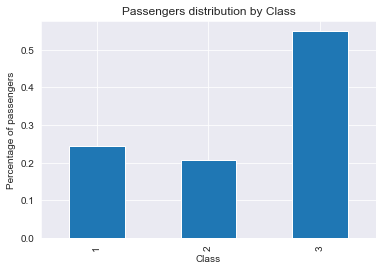

In [13]:
data.Pclass.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Passengers distribution by Class')
plt.xlabel('Class')
plt.ylabel('Percentage of passengers')

There are 3 classes for passengers. We can assume 1st class is the best one and 3rd class is the lowest one (following actual classification for trips). Third class is the majority class, having more than a half of the passengers. Second class is the class with lowest cuantity of passengers.

In [14]:
from statsmodels.graphics.mosaicplot import mosaic

In [15]:
data.groupby(['Pclass','Survived']).Name.count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
Name: Name, dtype: int64

[Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')]

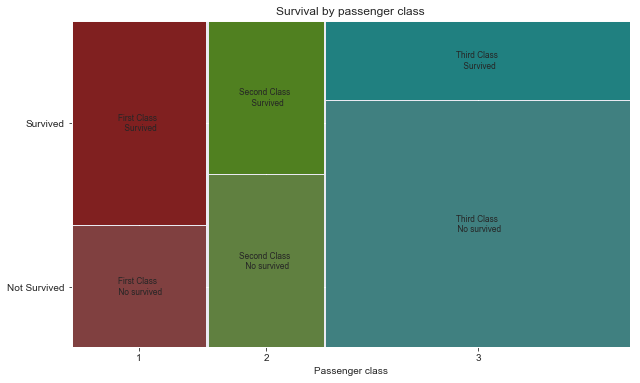

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
mosaic(data.groupby(['Pclass','Survived']).Name.count(), labelizer=lambda k: {
                                                                    ('1','0'): '''First Class \n No survived''',
                                                                    ('1','1'): '''First Class \n Survived''',
                                                                    ('2','0'): '''Second Class \n No survived''',
                                                                    ('2','1'): '''Second Class \n Survived''',
                                                                    ('3','0'): '''Third Class \n No survived''',
                                                                    ('3','1'): '''Third Class \n Survived'''
                                                                   }[k],
       title='Survival by passenger class',
       ax=ax
      )
ax.set_xlabel('Passenger class')
ax.set_yticklabels(['Not Survived','Survived'])

When looking at Survival distribution among Classes we see a clear tendency: the better the class, the higher the probability of surviving.

The mosaic plot show us this insights using relative statistics for each class. It do not show how big or small is the poblation for each passenger class. for this we would need another plot.

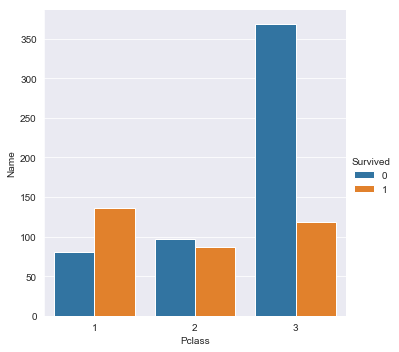

In [17]:
sns.catplot(x='Pclass', y='Name', hue='Survived',
            data= data.groupby(['Pclass','Survived']).Name.count().reset_index(),
            kind='bar'
           )

Looking at this plot we see that the amount of people who survived is relatively similar tru classes.

We can say that having a better class would give a higger probability of survival, but that would not be the only imporant feature 

#### Name

In [18]:
print('data type is: {}'.format(data.Name.dtype))

data type is: object


In [19]:
data.Name.nunique()

887

Feature "Name", as it says, refers to the names of passengers. This feature is unique to each passenger and would not give useful patterns for the model, so I am discarding it.

#### Sex

In [20]:
print('data type is: {}'.format(data.Sex.dtype))

data type is: object


In [21]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

Feature 'Sex' is a binary feature which indicates if passenger was male or female

Text(0, 0.5, 'Percentage of passengers')

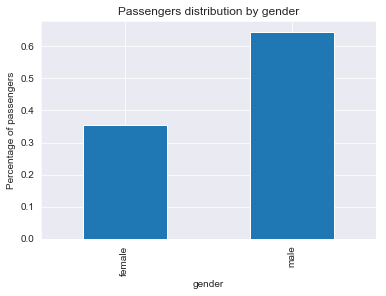

In [22]:
data.Sex.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Passengers distribution by gender')
plt.xlabel('gender')
plt.ylabel('Percentage of passengers')

Male passengers to female passengers ratio was 2:1. Let's see how this distribution affected the surviving rate. 

In [23]:
from statsmodels.graphics.mosaicplot import mosaic

In [24]:
data.groupby(['Sex','Survived']).Name.count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Name, dtype: int64

[Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')]

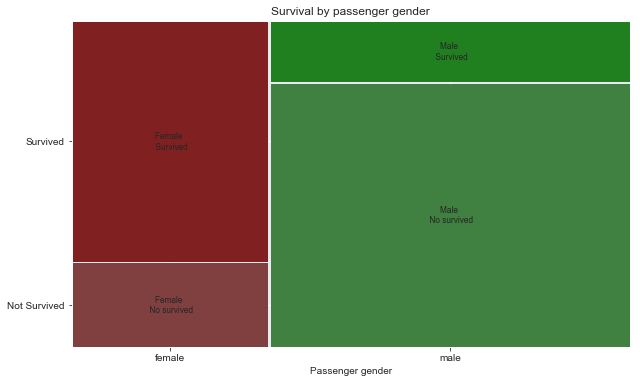

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
mosaic(data.groupby(['Sex','Survived']).Name.count(), labelizer=lambda k: {
                                                                    ('male','0'): '''Male \n No survived''',
                                                                    ('male','1'): '''Male \n Survived''',
                                                                    ('female','0'): '''Female \n No survived''',
                                                                    ('female','1'): '''Female \n Survived''',
                                                                   }[k],
       title='Survival by passenger gender',
       
       ax=ax
      )
ax.set_xlabel('Passenger gender')
ax.set_yticklabels(['Not Survived','Survived'])

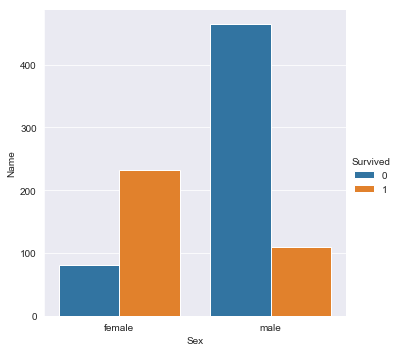

In [26]:
sns.catplot(x='Sex', y='Name', hue='Survived',
            data= data.groupby(['Sex','Survived']).Name.count().reset_index(),
            kind='bar'
           )

In [27]:
data.groupby(['Sex','Survived']).Name.count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Name, dtype: int64

The surviving ratio for female was higher than for males. Male surviving ratio was about 1/5. Female surviving ratio was about 3/4.

We can infer that women had priority when they were leaving the ship. This corresponds the code of conduct where women and child security would be prioritized when dealing with life-threatenign situations.

#### now, how this related to the passenger class? Do women from higher classes have even more survival opportunity than other women?

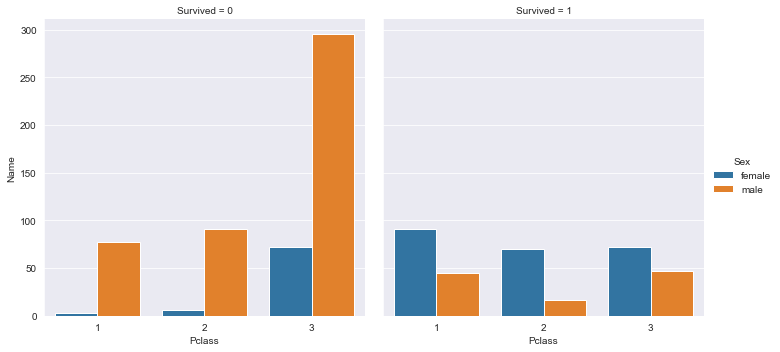

In [28]:
sns.catplot(x='Pclass',
            y='Name',
            hue='Sex',
            col='Survived',
            data=data.groupby(['Pclass','Sex','Survived']).Name.count().reset_index(),
            kind='bar',
           )

With these plots we see that the women from higher classes have a higher probability of survival, but in terms of quantity each class has a similar number of females who survived.

#### Age

In [29]:
print('data type is: {}'.format(data.Age.dtype))

data type is: float64


In [30]:
data.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 27.  , 54.  ,  2.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 23.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 24.  , 40.  , 48.  , 18.  , 66.  , 42.  , 21.  ,
        3.  , 30.  , 16.  ,  7.  , 49.  , 29.  , 65.  , 46.  , 28.5 ,
        5.  , 11.  , 45.  , 64.  , 17.  , 32.  , 25.  ,  0.83, 33.  ,
       59.  , 71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  ,
       36.5 , 51.  , 55.5 , 40.5 , 44.  ,  1.  , 60.  , 61.  , 56.  ,
       50.  , 36.  , 45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 57.  ,
       23.5 ,  0.92, 43.  , 10.  , 13.  ,  0.75, 69.  , 53.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Feature 'Age' is a discrete feature which indicates the passenger's age

In [31]:
data.Age.describe()

count    887.000000
mean      29.471443
std       14.121908
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

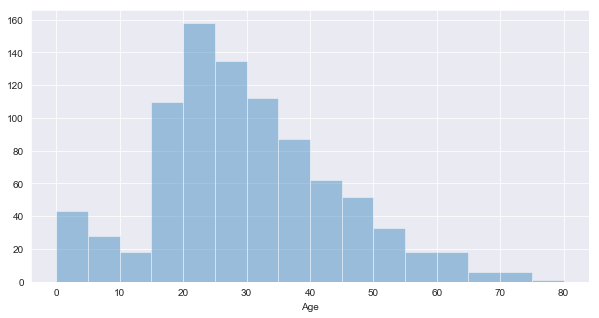

In [32]:
g = sns.distplot(a= np.round(data.Age), bins=16, kde=False)
g.figure.set_size_inches(10,5)

From this distribution we see people between 20and 40 has more than 50% of the total data

Text(0.5, 1.0, 'Age distribution by Survival')

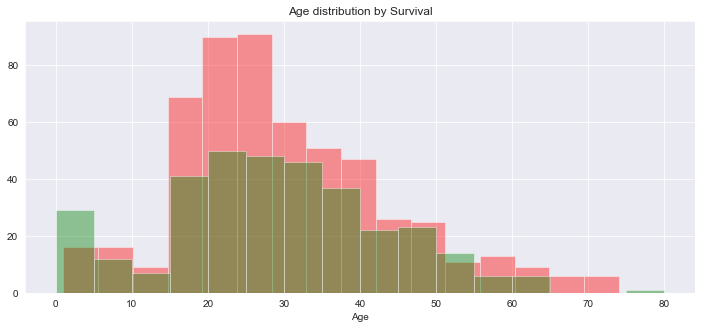

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.distplot(a= np.round(data.query('Survived==0').Age), bins=16, kde=False, color='red', ax=ax)
sns.distplot(a= np.round(data.query('Survived==1').Age), bins=16, kde=False, color='green', ax=ax)
plt.title('Age distribution by Survival')

Text(0.5, 1.0, '')

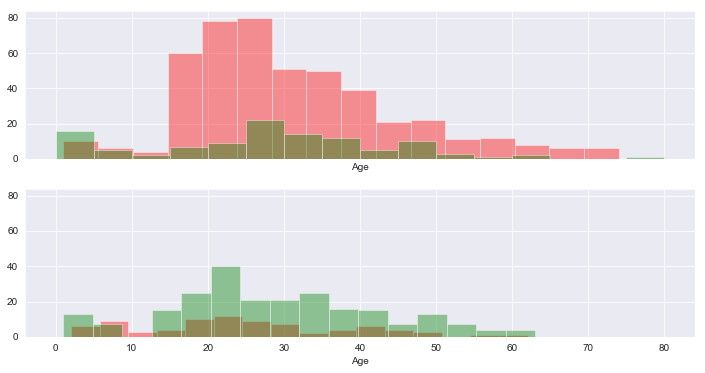

In [34]:
fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True, sharey=True)
sns.distplot(a= np.round(data.query('Sex=="male"').query('Survived==0').Age), bins=16, kde=False, ax = axs[0], color='red')
sns.distplot(a= np.round(data.query('Sex=="male"').query('Survived==1').Age), bins=16, kde=False, ax = axs[0], color='green')
sns.distplot(a= np.round(data.query('Sex=="female"').query('Survived==0').Age), bins=16, kde=False, ax = axs[1], color='red')
sns.distplot(a= np.round(data.query('Sex=="female"').query('Survived==1').Age), bins=16, kde=False, ax = axs[1], color='green')
axs[0].set_title('')
axs[1].set_title('')

Given this plots we can see that children (below 15 years) for both genders have a high probability of renewal.
Cuts or groups can be done for similar ages.

#### How about we group similar ages and make bins?

In [35]:
cuts = [0,15,30,50,100]
labels = ['Children', 'Young','Adult', 'Senior']

In [36]:
data['Age_group'] =  pd.cut(data.Age,
       bins=cuts,
       right=True,
       labels=labels
      )

Text(4.050000000000004, 0.5, 'Count')

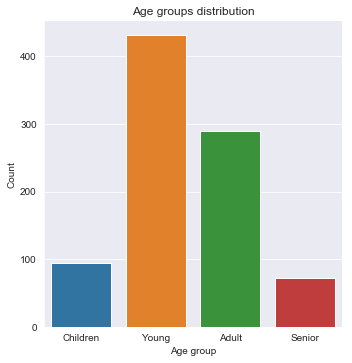

In [37]:
sns.catplot(x='index', y ='Age_group', data=data.Age_group.value_counts().reset_index(), kind='bar')
plt.title('Age groups distribution')
plt.xlabel('Age group')
plt.ylabel('Count')

In [38]:
data.Age_group.value_counts().reset_index()

,index,Age_group
0,Young,431
1,Adult,290
2,Children,94
3,Senior,72


Text(25.991597222222218, 0.5, 'Count')

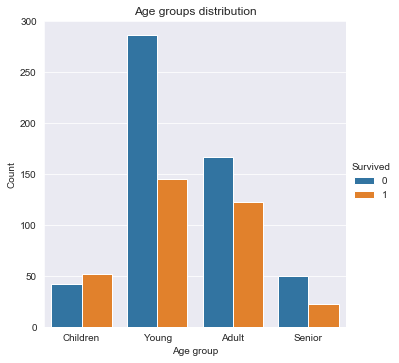

In [39]:
sns.catplot(y='Name', x ='Age_group', hue='Survived',
            data=data.groupby(['Age_group','Survived'], as_index=False).count(), kind='bar')
plt.title('Age groups distribution')
plt.xlabel('Age group')
plt.ylabel('Count')

Text(406.6246354166666, 0.5, 'Count')

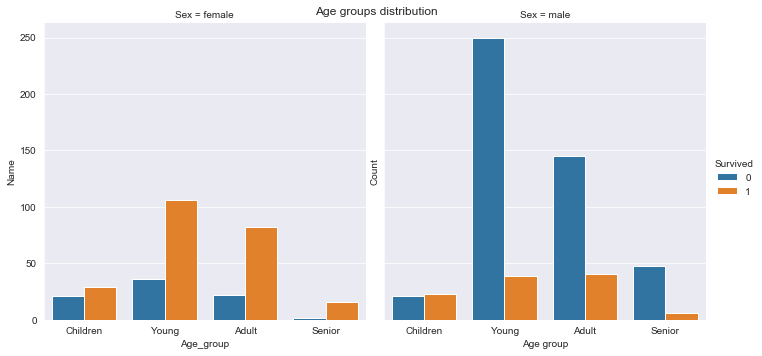

In [40]:
sns.catplot(y='Name', x ='Age_group', hue='Survived', col='Sex',
            data=data.groupby(['Age_group','Survived','Sex'], as_index=False).count(), kind='bar')
plt.suptitle('Age groups distribution')
plt.xlabel('Age group')
plt.ylabel('Count')

This grouping seems to work well.  We can see that children where the group with the highest survival probability within males.

#### Siblings/Spouses Aboard

In [41]:
print('data type is: {}'.format(data['Siblings/Spouses Aboard'].dtype))

data type is: int64


In [42]:
data['Siblings/Spouses Aboard'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Feature 'Siblings/Spouses Aboard' is a discrete feature which indicates the how many horizontal relatives the passenger has in the ship

In [43]:
data['Siblings/Spouses Aboard'].describe()

count    887.000000
mean       0.525366
std        1.104669
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: Siblings/Spouses Aboard, dtype: float64

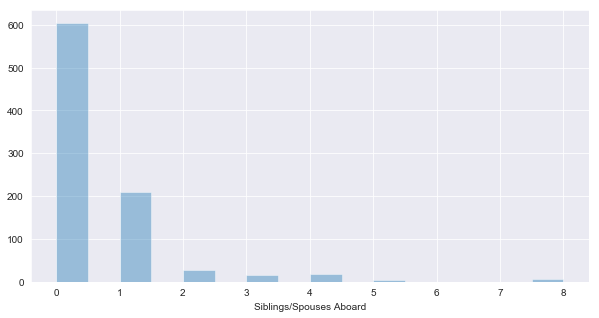

In [44]:
g = sns.distplot(a= np.round(data['Siblings/Spouses Aboard']), bins=16, kde=False)
g.figure.set_size_inches(10,5)

This is a left skewed distribution where passengers with +2 siblings are infrequent. Let's group them in a single group

In [45]:
cuts = [-1,0,1,10]
labels = ['No Siblings/Spouse', 'Single sibling/spouse', '+2 siblings/sopuse']

In [46]:
data['Siblings/Spouse group']  =pd.cut(data['Siblings/Spouses Aboard'],
       bins=cuts,
       right=True,
       labels=labels
)

Text(0.5, 1.0, 'Passenger distribution by number of siblings/spouse ')

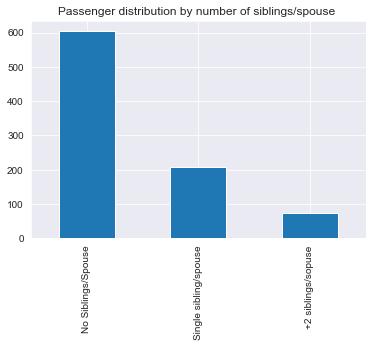

In [47]:
data['Siblings/Spouse group'].value_counts().plot(kind='bar')
plt.title('Passenger distribution by number of siblings/spouse ')

Text(0.5, 1.0, 'Siblings/spouse group survival rate')

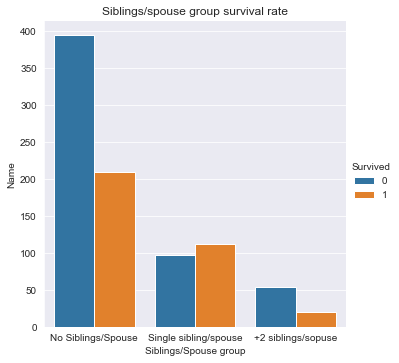

In [48]:
sns.catplot(x='Siblings/Spouse group', y='Name', hue='Survived',
            data=data.groupby(['Siblings/Spouse group','Survived'], as_index=False).count(),
            kind='bar'
           )
plt.title('Siblings/spouse group survival rate')

#### can this be related to gender?

In [49]:
data.query('Sex=="male"').rename({'Name':'Value'}).groupby(['Siblings/Spouse group','Survived'])

Text(0.5, 0.98, 'Siblings/spouse group survival rate')

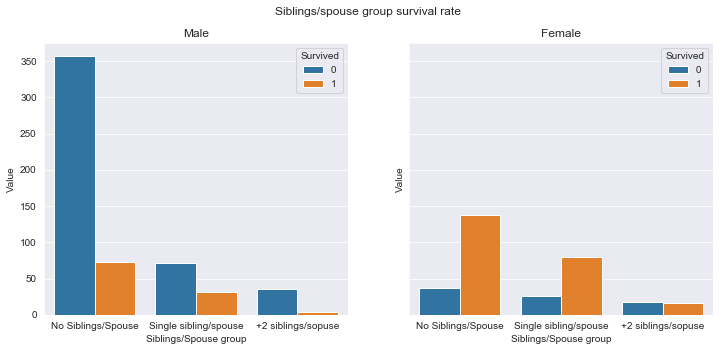

In [50]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
sns.catplot(x='Siblings/Spouse group', y='Value', hue='Survived',
            data=data.query('Sex=="male"').rename({'Name':'Value'}, axis=1).groupby(['Siblings/Spouse group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[0]
           )
sns.catplot(x='Siblings/Spouse group', y='Value', hue='Survived',
            data=data.query('Sex=="female"').rename({'Name':'Value'}, axis=1).groupby(['Siblings/Spouse group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[1]
           )
axs[0].set_title('Male')
axs[1].set_title('Female')
plt.close(3)
plt.close(2)
plt.suptitle('Siblings/spouse group survival rate')

Here we can see that females with no spouse/siblings have a bigger rate of survival than those whose have siblings

#### Parents/Children Aboard

In [51]:
print('data type is: {}'.format(data['Parents/Children Aboard'].dtype))

data type is: int64


In [52]:
data['Parents/Children Aboard'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

Feature 'Parents/Children Aboard' is a discrete feature which indicates the how many vertical relatives the passenger has in the ship

In [53]:
data['Parents/Children Aboard'].describe()

count    887.000000
mean       0.383315
std        0.807466
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parents/Children Aboard, dtype: float64

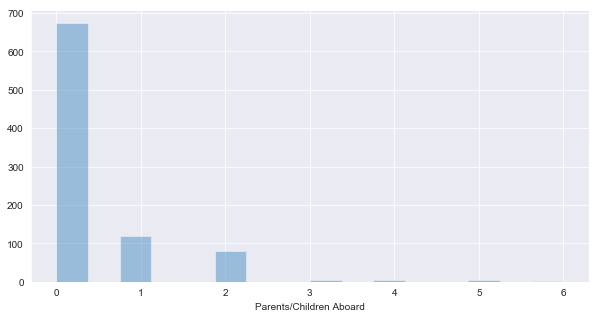

In [54]:
g = sns.distplot(a= np.round(data['Parents/Children Aboard']), bins=16, kde=False)
g.figure.set_size_inches(10,5)

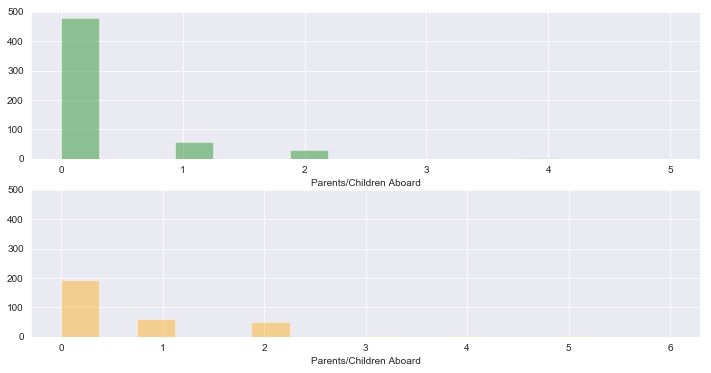

In [55]:
fig, axs = plt.subplots(2,1, figsize=(12,6), sharey=True) 
sns.distplot(a= np.round(data.query('Sex=="male"')['Parents/Children Aboard']), bins=16, kde=False, ax=axs[0], color='green')
sns.distplot(a= np.round(data.query('Sex=="female"')['Parents/Children Aboard']), bins=16, kde=False, ax=axs[1], color='orange')

This is a left skewed distribution where passengers with +1 siblings are infrequent. Let's group them in a single group

In [56]:
cuts = [-1,0,6]
labels = ['No Parents/childs', 'Has parents/childs']

In [57]:
data['Parents/Children group']  =pd.cut(data['Parents/Children Aboard'],
       bins=cuts,
       right=True,
       labels=labels
)

Text(0.5, 1.0, 'Passenger distribution by number of parents/childs ')

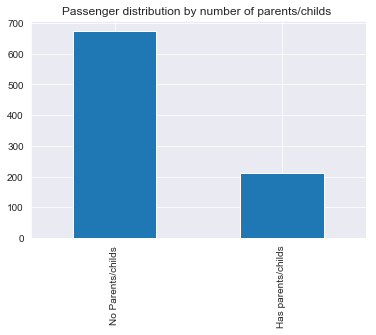

In [58]:
data['Parents/Children group'].value_counts().plot(kind='bar')
plt.title('Passenger distribution by number of parents/childs ')

Text(0.5, 1.0, 'Parents/children group survival rate')

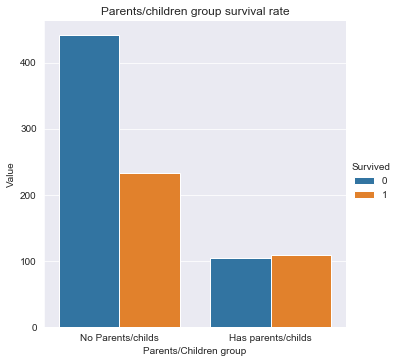

In [59]:
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar'
           )
plt.title('Parents/children group survival rate')

#### Can this be related to gender? or class?

Text(0.5, 0.98, 'Parents/Children group survival rate')

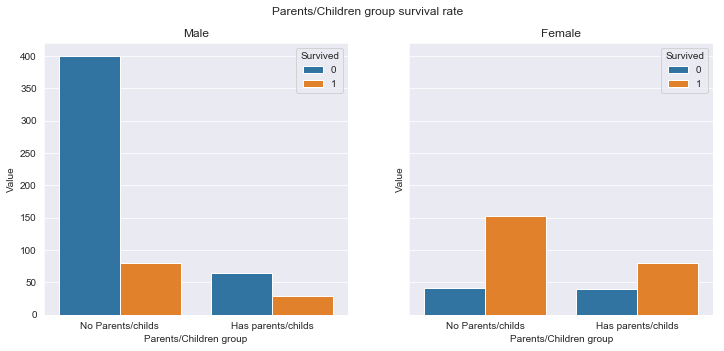

In [60]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Sex=="male"').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[0]
           )
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Sex=="female"').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[1]
           )
axs[0].set_title('Male')
axs[1].set_title('Female')
plt.close(3)
plt.close(2)
plt.suptitle('Parents/Children group survival rate')

Text(0.5, 0.98, 'Parents/Children group survival rate')

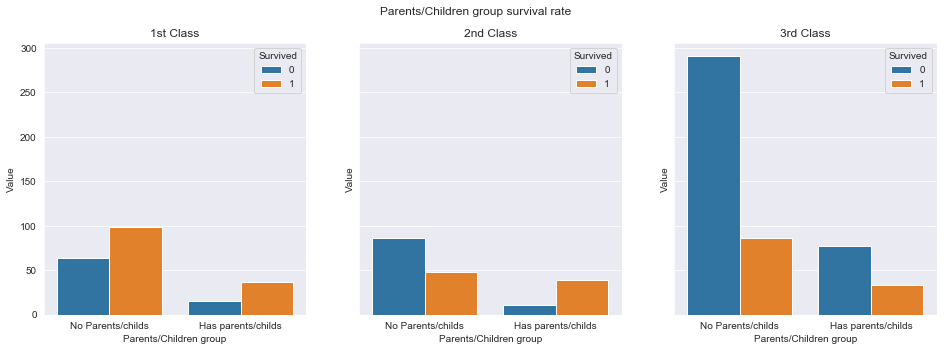

In [61]:
fig, axs = plt.subplots(1,3, figsize=(16,5), sharey=True)
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==1').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[0]
           )
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==2').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[1]
           )
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==3').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[2]
           )
axs[0].set_title('1st Class')
axs[1].set_title('2nd Class')
axs[2].set_title('3rd Class')
plt.close(2)
plt.close(3)
plt.close(4)
plt.suptitle('Parents/Children group survival rate')

We can see that people who had childs and where in the 3rd class had the lowest survival rate compared to other classes.
Passengers from the first class hd a bigger probability of survive compared from other classes.

#### Fare

In [62]:
print('data type is: {}'.format(data['Fare'].dtype))

data type is: float64


In [63]:
data['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

Feature 'fare' is a continuous feature which indicates the price the passenger paid to be aboard.

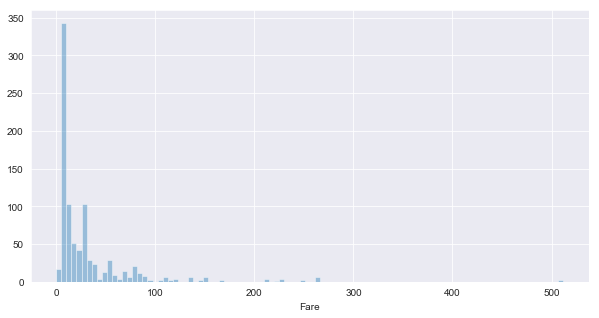

In [64]:
g = sns.distplot(a= np.round(data['Fare']), bins=100, kde=False)
g.figure.set_size_inches(10,5)

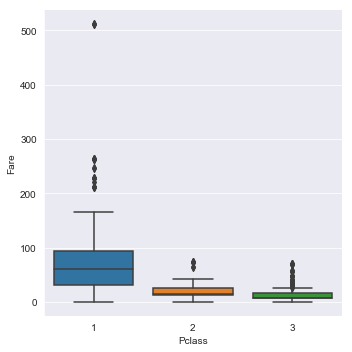

In [65]:
sns.catplot(y='Fare', x='Pclass',data=data, kind='box')

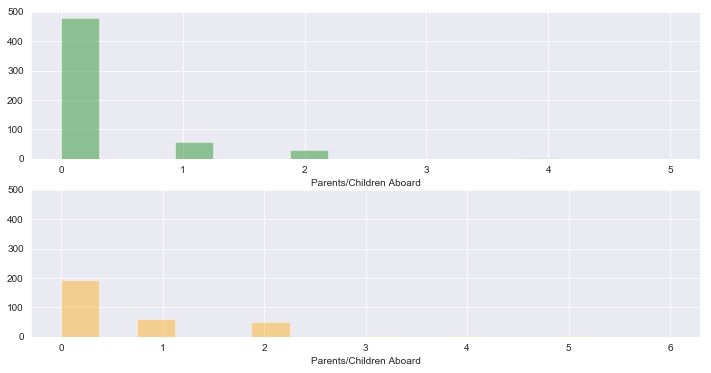

In [66]:
fig, axs = plt.subplots(2,1, figsize=(12,6), sharey=True) 
sns.distplot(a= np.round(data.query('Sex=="male"')['Parents/Children Aboard']), bins=16, kde=False, ax=axs[0], color='green')
sns.distplot(a= np.round(data.query('Sex=="female"')['Parents/Children Aboard']), bins=16, kde=False, ax=axs[1], color='orange')

This is a left skewed distribution where passengers with +1 siblings are infrequent. Let's group them in a single group

In [67]:
cuts = [-1,0,6]
labels = ['No Parents/childs', 'Has parents/childs']

In [68]:
data['Parents/Children group']  =pd.cut(data['Parents/Children Aboard'],
       bins=cuts,
       right=True,
       labels=labels
)

Text(0.5, 1.0, 'Passenger distribution by number of parents/childs ')

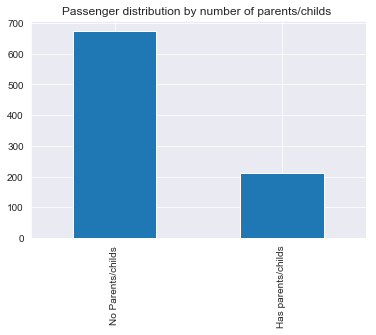

In [69]:
data['Parents/Children group'].value_counts().plot(kind='bar')
plt.title('Passenger distribution by number of parents/childs ')

Text(0.5, 1.0, 'Parents/children group survival rate')

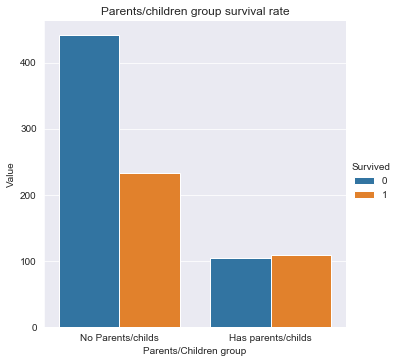

In [70]:
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar'
           )
plt.title('Parents/children group survival rate')

#### Can this be related to gender? or class?

Text(0.5, 0.98, 'Parents/Children group survival rate')

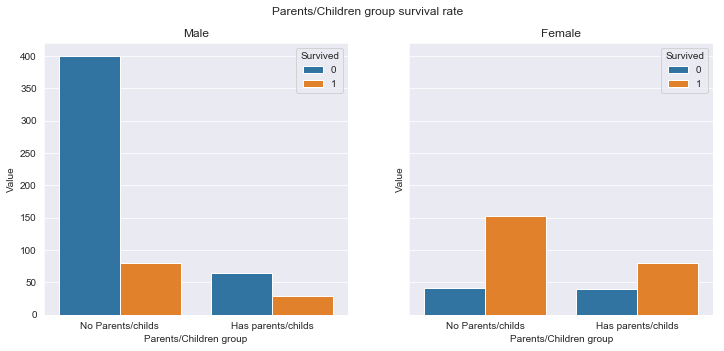

In [71]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Sex=="male"').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[0]
           )
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Sex=="female"').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[1]
           )
axs[0].set_title('Male')
axs[1].set_title('Female')
plt.close(3)
plt.close(2)
plt.suptitle('Parents/Children group survival rate')

Text(0.5, 0.98, 'Parents/Children group survival rate')

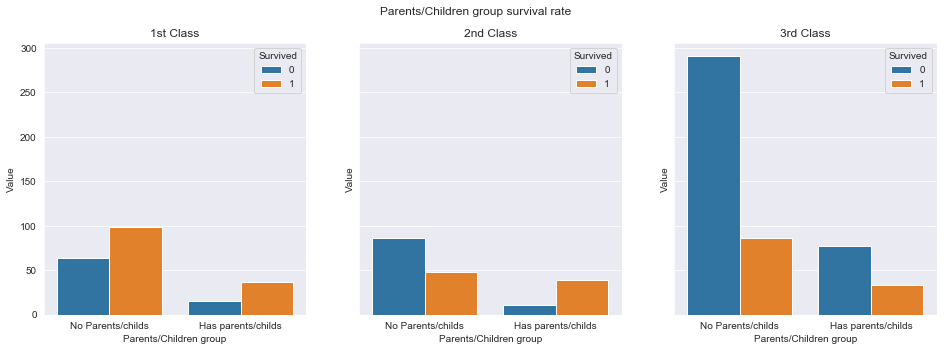

In [72]:
fig, axs = plt.subplots(1,3, figsize=(16,5), sharey=True)
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==1').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[0]
           )
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==2').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[1]
           )
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==3').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[2]
           )
axs[0].set_title('1st Class')
axs[1].set_title('2nd Class')
axs[2].set_title('3rd Class')
plt.close(2)
plt.close(3)
plt.close(4)
plt.suptitle('Parents/Children group survival rate')

From what we can see there is a strong correlation with having childs/parnets and surviving for the first and second class. But it do not distinguishes if they were children or parents, so is somehow misleading.

so let's divide parents, childs by age (there is no direct relationship in the data aside from the name)

In [73]:
def child_parent(row):
    if((row['Parents/Children Aboard']>0)&(row['Age_group']!='Children')):
        return 'Parent'
    elif((row['Parents/Children Aboard']>0)&(row['Age_group']=='Children')):
        return 'Children'
    else:
        return 'No parents/childs'

In [74]:
data['Parents/Children group'] = data.apply(child_parent, axis=1)

Text(0.5, 0.98, 'Parents/Children group survival rate')

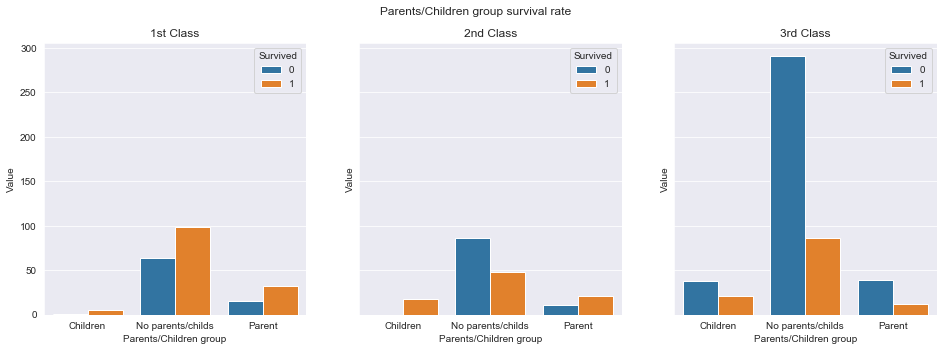

In [75]:
fig, axs = plt.subplots(1,3, figsize=(16,5), sharey=True)
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==1').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[0]
           )
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==2').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[1]
           )
sns.catplot(x='Parents/Children group', y='Value', hue='Survived',
            data=data.query('Pclass==3').rename({'Name':'Value'}, axis=1).groupby(['Parents/Children group','Survived'], as_index=False).count(),
            kind='bar',
            ax=axs[2]
           )
axs[0].set_title('1st Class')
axs[1].set_title('2nd Class')
axs[2].set_title('3rd Class')
plt.close(2)
plt.close(3)
plt.close(4)
plt.suptitle('Parents/Children group survival rate')

All childs from the first and second class but it did not happened for childs from the third class.

As we already know females had also a higher survival probability at any age, so I will not dig more about it.

#### Fare

In [76]:
print('data type is: {}'.format(data.Fare.dtype))

data type is: float64


In [77]:
data.Fare.nunique()

248

Feature 'Fare' is a continuous feature which indicates the passenger's fare to get in the ship

In [78]:
data.Fare.describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

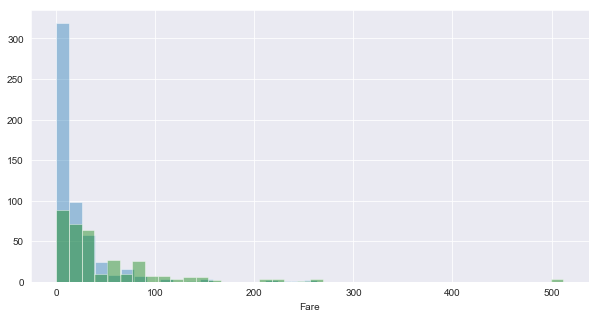

In [79]:
g = sns.distplot(a= np.round(data.query('Survived==0').Fare), bins=20, kde=False)
g = sns.distplot(a= np.round(data.query('Survived==1').Fare), bins=40, kde=False, color='green')
g.figure.set_size_inches(10,5)

let's see how the probability of survival behave when the fare increases

In [80]:
from copy import deepcopy

In [81]:
temp = deepcopy(data)

In [82]:
temp.Fare = np.ceil(temp.Fare/3)

In [83]:
temp.Fare

0       3.0
1      24.0
2       3.0
3      18.0
4       3.0
       ... 
882     5.0
883    10.0
884     8.0
885    10.0
886     3.0
Name: Fare, Length: 887, dtype: float64

In [84]:
temp = temp.groupby('Fare', as_index=True).agg(
    Value = pd.NamedAgg('Survived', 'mean'),
    Size = pd.NamedAgg('Survived', 'count')
).reset_index(drop=False)

#### using linear regression

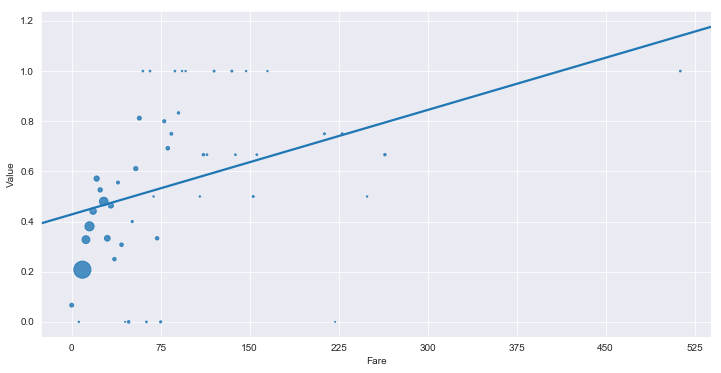

In [85]:
g = sns.regplot(x='Fare', y='Value', scatter_kws={'s':temp.Size}, data=temp, ci=0)
g.set_xticklabels([0,0,75,150,225,300, 375, 450, 525])
g.figure.set_size_inches(12,6)

#### Using lowess smoothing

In [86]:
from statsmodels.nonparametric import smoothers_lowess

In [87]:
temp = deepcopy(data)

In [88]:
temp.Fare = np.ceil(temp.Fare/3)

In [89]:
fare_dict = {}

In [90]:
for fare in np.sort(temp.Fare.unique()):
    fare_dict.update({fare: temp[temp.Fare == fare].Survived.mean()})

In [91]:
temp['Survived'] = temp.Fare.map(fare_dict)

In [92]:
lowess_temp = temp.groupby('Fare').filter(lambda x: x['Survived'].size>8)

In [93]:
lowess = smoothers_lowess.lowess(lowess_temp.Survived, lowess_temp.Fare, frac=1)

In [94]:
temp = deepcopy(data)

In [95]:
temp.Fare = np.ceil(temp.Fare/3)

In [96]:
temp = temp.groupby('Fare', as_index=True).agg(
    Value = pd.NamedAgg('Survived', 'mean'),
    Size = pd.NamedAgg('Survived', 'count')
).reset_index(drop=False)

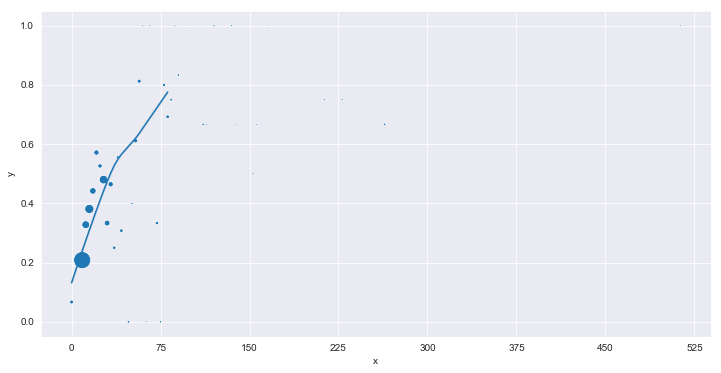

In [97]:
sns.scatterplot(x='Fare', y='Value', s=temp.Size, data=temp)
g=sns.lineplot(x='x' ,y='y', data= pd.DataFrame(lowess, columns=['x','y']))
g.set_xticklabels([0,0,75,150,225,300, 375, 450, 525])
g.figure.set_size_inches(12,6)

We can see in both scatterplots how the probability of survival increases as the fare goes up.

how this works for classes?

In [98]:
from statsmodels.nonparametric import smoothers_lowess

In [99]:
temp = deepcopy(data.query('Pclass==3'))

In [100]:
temp.Fare = np.ceil(temp.Fare/3)

In [101]:
fare_dict = {}

In [102]:
for fare in np.sort(temp.Fare.unique()):
    fare_dict.update({fare: temp[temp.Fare == fare].Survived.mean()})

In [103]:
temp['Survived'] = temp.Fare.map(fare_dict)

In [104]:
size_ = temp.groupby('Fare', as_index=True).agg(
    Value = pd.NamedAgg('Survived', 'mean'),
    Size = pd.NamedAgg('Survived', 'count')
).reset_index(drop=False)

In [105]:
size_

,Fare,Value,Size
0,0.0,0.250000,4
1,2.0,0.000000,1
2,3.0,0.208191,293
3,4.0,0.312500,32
4,5.0,0.291667,24
5,6.0,0.435897,39
6,7.0,0.529412,17
7,8.0,0.384615,13
8,9.0,0.083333,12
9,10.0,0.000000,11


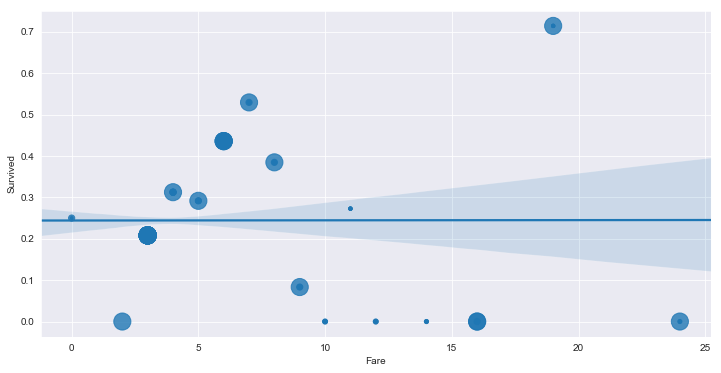

In [106]:
g= sns.regplot(x='Fare', y='Survived', scatter_kws={'s':size_.Size}, data=temp)
g.figure.set_size_inches(12,6)

In [107]:
temp = deepcopy(data.query('Pclass==2'))

In [108]:
temp.Fare = np.ceil(temp.Fare/3)

In [109]:
fare_dict = {}

In [110]:
for fare in np.sort(temp.Fare.unique()):
    fare_dict.update({fare: temp[temp.Fare == fare].Survived.mean()})

In [111]:
temp['Survived'] = temp.Fare.map(fare_dict)

In [112]:
size_ = temp.groupby('Fare', as_index=True).agg(
    Value = pd.NamedAgg('Survived', 'mean'),
    Size = pd.NamedAgg('Survived', 'count')
).reset_index(drop=False)

In [113]:
size_

,Fare,Value,Size
0,0.0,0.000000,6
1,4.0,0.344828,29
2,5.0,0.416667,60
3,6.0,0.500000,4
4,7.0,0.636364,11
5,8.0,0.833333,6
6,9.0,0.540541,37
7,10.0,0.714286,7
8,11.0,0.666667,6
9,13.0,0.625000,8


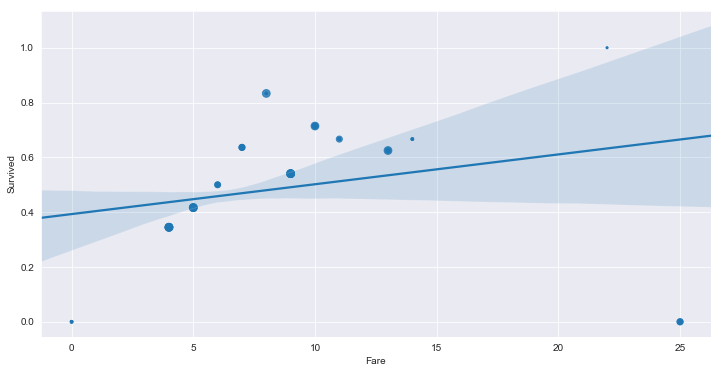

In [114]:
g= sns.regplot(x='Fare', y='Survived', scatter_kws={'s':size_.Size}, data=temp)
g.figure.set_size_inches(12,6)

In [115]:
temp = deepcopy(data.query('Pclass==1'))

In [116]:
temp.Fare = np.ceil(temp.Fare/3)

In [117]:
fare_dict = {}

In [118]:
for fare in np.sort(temp.Fare.unique()):
    fare_dict.update({fare: temp[temp.Fare == fare].Survived.mean()})

In [119]:
temp['Survived'] = temp.Fare.map(fare_dict)

In [120]:
size_ = temp.groupby('Fare', as_index=True).agg(
    Value = pd.NamedAgg('Survived', 'mean'),
    Size = pd.NamedAgg('Survived', 'count')
).reset_index(drop=False)

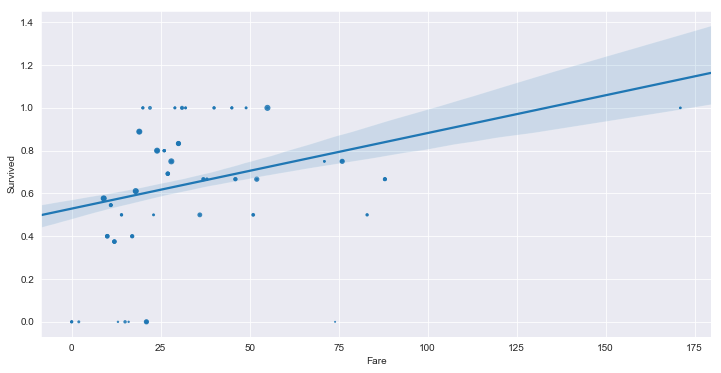

In [121]:
g= sns.regplot(x='Fare', y='Survived', scatter_kws={'s':size_.Size}, data=temp)
g.figure.set_size_inches(12,6)

so the ones in the 3rd class where the ones where the fare had a minimum influence

### Data exploration summary

1.- the better the class, the more survival probability

2.- females had a much higher survival probability (proportion)

3.- childs had a high survival probability regardless gender

4.- there is a possitive correlation between the survival probability and the fare (except for the 3rd class) 


## Building a ML model

Here I will build and train several ML models locking for for the best one. Also, I will try different features (original and processed ones). At the end I will measure attribute importance for the best model

### Splitting data

In [389]:
y=data.Survived

In [390]:
results = []

In [391]:
feature_importance = []

### Working with raw data

In [392]:
raw_data = data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard','Fare']]

In [393]:
# feature Sex only has 2 values, so I will map it to a binary feature
raw_data['Sex']= raw_data.Sex.map({'male':0, 'female':1})

C:\Users\sbanuelo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [394]:
raw_data.info()
# now all features are nunmeric, so models should work fine with them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
Pclass                     887 non-null int64
Sex                        887 non-null int64
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.7 KB


In [395]:
from sklearn.model_selection import train_test_split

In [396]:
x_training, x_test, y_training, y_test = train_test_split(raw_data.values, y, test_size=0.2)

In [397]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

### Linear regression

In [398]:
from sklearn.linear_model import LogisticRegression

In [399]:
clf = LogisticRegression(random_state=0).fit(x_training, y_training)

In [400]:
y_pred = clf.predict(x_training)

In [401]:
print('Accuracy: {}'.format(accuracy_score(y_training, y_pred)))
print('F1: {}'.format(f1_score(y_training, y_pred)))
print('{}'.format(confusion_matrix(y_training, y_pred)))

Accuracy: 0.8081805359661495
F1: 0.7343750000000001
[[385  55]
 [ 81 188]]


In [402]:
y_pred = clf.predict(x_test)

In [403]:
acc_scr = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(acc_scr))
f1_scr = f1_score(y_test, y_pred)
print('F1: {}'.format(f1_scr))
cf_mtx = confusion_matrix(y_test, y_pred)
print('{}'.format(cf_mtx))
results.append((acc_scr, f1_scr, cf_mtx))

Accuracy: 0.797752808988764
F1: 0.7464788732394365
[[89 16]
 [20 53]]


#### Let's check feature importance

In [404]:
feature_imp= (zip(raw_data.columns,clf.coef_[0]))

In [405]:
feature_importance.append(feature_imp)

In [406]:
print(*zip(raw_data.columns,clf.coef_[0]))

('Pclass', -1.1710029321957935) ('Sex', 2.548848830441765) ('Age', -0.038998502776991836) ('Siblings/Spouses Aboard', -0.3396725253235099) ('Parents/Children Aboard', -0.04141367863693679) ('Fare', 0.0009104148400945556)


In this model the most important features is Passenger class (with a negative correlation) and Sex (with a positive correlation)

The negative correlation in Pclass implies that the 'higher' the digit representig the class (number 3> number 1, though 3rd class is lower than 1rs class. This should be changed to a ordinary feature)

For Sex feature, the positive correlation implies that the value related to '1' is a important factor when predicting a passenger survival. From the pre-processin we mapped 1-female and 0-male.

### Working with processed data

In [407]:
processed_data= data[['Pclass','Sex', 'Fare','Age_group', 'Siblings/Spouse group', 'Parents/Children group']]

In [408]:
processed_data['Sex'] = processed_data.Sex.map({'female':'1', 'male':'0'})

C:\Users\sbanuelo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [409]:
processed_data.Pclass = pd.Categorical(processed_data.Pclass, categories = [3,2,1], ordered=True)

C:\Users\sbanuelo\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [410]:
processed_data['Age_group']=processed_data['Age_group'].map({"Children":0 ,'Young':1, 'Adult':2, 'Senior':3})

C:\Users\sbanuelo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [411]:
processed_data['Siblings/Spouse group'].unique()

[Single sibling/spouse, No Siblings/Spouse, +2 siblings/sopuse]
Categories (3, object): [No Siblings/Spouse < Single sibling/spouse < +2 siblings/sopuse]

In [412]:
processed_data['Siblings/Spouse group']=processed_data['Siblings/Spouse group'].map({"No Siblings/Spouse": 0 ,'Single sibling/spouse':1, '+2 siblings/sopuse':2})

C:\Users\sbanuelo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [413]:
processed_data['Parents/Children group'].unique()

array(['No parents/childs', 'Children', 'Parent'], dtype=object)

In [414]:
processed_data['Parents/Children group']=processed_data['Parents/Children group'].map({"No parents/childs": 0 ,'Children':1, 'Parent':2})

C:\Users\sbanuelo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [415]:
processed_data

,Pclass,Sex,Fare,Age_group,Siblings/Spouse group,Parents/Children group
0,3,0,7.2500,1,1,0
1,1,1,71.2833,2,1,0
2,3,1,7.9250,1,0,0
3,1,1,53.1000,2,1,0
4,3,0,8.0500,2,0,0
...,...,...,...,...,...,...
882,2,0,13.0000,1,0,0
883,1,1,30.0000,1,0,0
884,3,1,23.4500,0,1,1
885,1,0,30.0000,1,0,0


### Linear regression

In [416]:
x_training, x_test, y_training, y_test = train_test_split(processed_data.values, y, test_size=0.2)

In [417]:
clf = LogisticRegression(random_state=0).fit(x_training, y_training)

In [418]:
y_pred = clf.predict(x_training)

In [419]:
print('Accuracy: {}'.format(accuracy_score(y_training, y_pred)))
print('F1: {}'.format(f1_score(y_training, y_pred)))
print('{}'.format(confusion_matrix(y_training, y_pred)))

Accuracy: 0.7954866008462623
F1: 0.7339449541284404
[[364  63]
 [ 82 200]]


In [420]:
y_pred = clf.predict(x_test)

In [421]:
acc_scr = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(acc_scr))
f1_scr = f1_score(y_test, y_pred)
print('F1: {}'.format(f1_scr))
cf_mtx = confusion_matrix(y_test, y_pred)
print('{}'.format(cf_mtx))
results.append((acc_scr, f1_scr, cf_mtx))

Accuracy: 0.7696629213483146
F1: 0.6371681415929203
[[101  17]
 [ 24  36]]


#### Let's check feature importance

In [422]:
feature_imp= (zip(processed_data.columns,clf.coef_[0]))

In [423]:
feature_importance.append(feature_imp)

In [424]:
print(*zip(processed_data.columns,clf.coef_[0]))

('Pclass', -0.9959618090520391) ('Sex', 2.5765211951661273) ('Fare', 0.00365853164098634) ('Age_group', -0.6263573853651713) ('Siblings/Spouse group', -0.4422886882606884) ('Parents/Children group', -0.07666523940197958)


## Comparing

In [425]:
results = pd.DataFrame(results, columns = ['Acc','F1','Matrix'])

Text(0.5, 1.0, 'Accuracy')

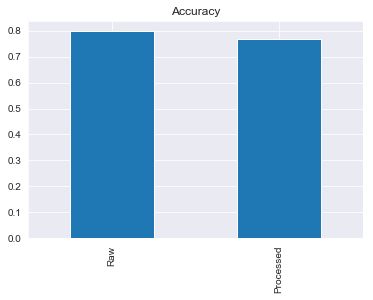

In [426]:
ax =results.Acc.plot(kind='bar')
ax.set_xticklabels(['Raw', 'Processed'])
ax.set_title('Accuracy')

Text(0.5, 1.0, 'F1')

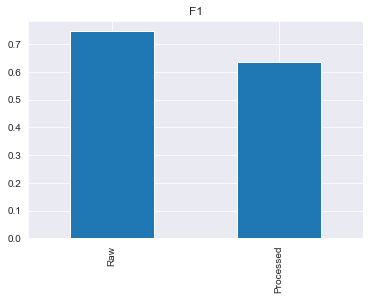

In [427]:
ax =results.F1.plot(kind='bar')
ax.set_xticklabels(['Raw', 'Processed'])
ax.set_title('F1')

well, I see that processed are not as good as the raw ones

## Doing a decision forest

In [447]:
from sklearn.tree import DecisionTreeClassifier

In [450]:
x_training, x_test, y_training, y_test = train_test_split(raw_data.values, y, test_size=0.2)

In [488]:
y.value_counts(normalize=True)

0    0.614431
1    0.385569
Name: Survived, dtype: float64

In [495]:
tree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, class_weight={0:1 , 1:1} )

In [496]:
tree.fit(x_training, y_training)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=15, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [497]:
y_pred = tree.predict(x_training)

In [498]:
print('Accuracy: {}'.format(accuracy_score(y_training, y_pred)))
print('F1: {}'.format(f1_score(y_training, y_pred)))
print('{}'.format(confusion_matrix(y_training, y_pred)))

Accuracy: 0.8970380818053597
F1: 0.860952380952381
[[410  21]
 [ 52 226]]


In [499]:
y_pred = tree.predict(x_test)

In [500]:
acc_scr = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(acc_scr))
f1_scr = f1_score(y_test, y_pred)
print('F1: {}'.format(f1_scr))
cf_mtx = confusion_matrix(y_test, y_pred)
print('{}'.format(cf_mtx))

Accuracy: 0.8033707865168539
F1: 0.6956521739130435
[[103  11]
 [ 24  40]]


In [517]:
x_training, x_test, y_training, y_test = train_test_split(processed_data.values, y, test_size=0.2)

In [518]:
tree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, class_weight={0:1 , 1:2} )

In [519]:
tree.fit(x_training, y_training)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='gini', max_depth=15, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [520]:
y_pred = tree.predict(x_training)

In [521]:
print('Accuracy: {}'.format(accuracy_score(y_training, y_pred)))
print('F1: {}'.format(f1_score(y_training, y_pred)))
print('{}'.format(confusion_matrix(y_training, y_pred)))

Accuracy: 0.8744710860366713
F1: 0.8430335097001764
[[381  45]
 [ 44 239]]


In [522]:
y_pred = tree.predict(x_test)

In [523]:
acc_scr = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(acc_scr))
f1_scr = f1_score(y_test, y_pred)
print('F1: {}'.format(f1_scr))
cf_mtx = confusion_matrix(y_test, y_pred)
print('{}'.format(cf_mtx))

Accuracy: 0.8314606741573034
F1: 0.7457627118644068
[[104  15]
 [ 15  44]]


### Doing a Random Forest

In [501]:
from sklearn.ensemble import RandomForestClassifier

In [524]:
x_training, x_test, y_training, y_test = train_test_split(raw_data.values, y, test_size=0.2)

In [525]:
tree = RandomForestClassifier(max_depth=15, min_samples_leaf=4, class_weight={0:1 , 1:1} )

In [526]:
tree.fit(x_training, y_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [527]:
y_pred = tree.predict(x_training)

In [528]:
print('Accuracy: {}'.format(accuracy_score(y_training, y_pred)))
print('F1: {}'.format(f1_score(y_training, y_pred)))
print('{}'.format(confusion_matrix(y_training, y_pred)))

Accuracy: 0.8956276445698167
F1: 0.8565891472868217
[[414  23]
 [ 51 221]]


In [529]:
y_pred = tree.predict(x_test)

In [530]:
acc_scr = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(acc_scr))
f1_scr = f1_score(y_test, y_pred)
print('F1: {}'.format(f1_scr))
cf_mtx = confusion_matrix(y_test, y_pred)
print('{}'.format(cf_mtx))

Accuracy: 0.7921348314606742
F1: 0.7040000000000001
[[97 11]
 [26 44]]


In [531]:
x_training, x_test, y_training, y_test = train_test_split(processed_data.values, y, test_size=0.2)

In [533]:
tree = RandomForestClassifier(max_depth=15, min_samples_leaf=4, class_weight={0:1 , 1:2} )

In [534]:
tree.fit(x_training, y_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [535]:
y_pred = tree.predict(x_training)

In [536]:
print('Accuracy: {}'.format(accuracy_score(y_training, y_pred)))
print('F1: {}'.format(f1_score(y_training, y_pred)))
print('{}'.format(confusion_matrix(y_training, y_pred)))

Accuracy: 0.8617771509167842
F1: 0.8304498269896194
[[371  56]
 [ 42 240]]


In [537]:
y_pred = tree.predict(x_test)

In [538]:
acc_scr = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(acc_scr))
f1_scr = f1_score(y_test, y_pred)
print('F1: {}'.format(f1_scr))
cf_mtx = confusion_matrix(y_test, y_pred)
print('{}'.format(cf_mtx))

Accuracy: 0.8539325842696629
F1: 0.7903225806451613
[[103  15]
 [ 11  49]]


We can see that the Random forest had the best Accuracy and F1 score